In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# About the DataSet
## Description:
- The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

In [2]:
# Loading the dataset
filepath = r"Student_Performance.csv"
df= pd.read_csv(filepath)
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.describe(include=object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [7]:
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


## Findings

1. This dataset is fairly large containing 10000 datapoints and 6 columns
2. The average hours a student studies is 5 hours.
3. The average score in the previous term of a student is 69
4. The average number of hours a student sleeps is 6.5 hours.
5. The average sample papers practised by a student is 4.5
6. The average performance index of a student is 55.2
7. There are no null values.
8. There are 127 duplicate entries, but none seem to be of the same record, the duplicate entry range in different columns for each student, which makes sense as 2 students may study or sleep for the same number of hours. So, the duplicate entries here are not a concern for us.

#### Based on the above, I have identified 5 input features (x) and 1 target variable (y):

- Input Features (x)
    - Hours Studied
    - Previous Scores
    - Extracurricular Activities
    - Sleep Hours
    - Sample Question Papers Practiced
- Target Variable (y)
    - Performance Index

## EDA

- Plotting out each column.
- Checking for outliers and skewness.
- Exploring the relationship b/w each input feature and the target variable.

### Target Variable(y) - Performance Index


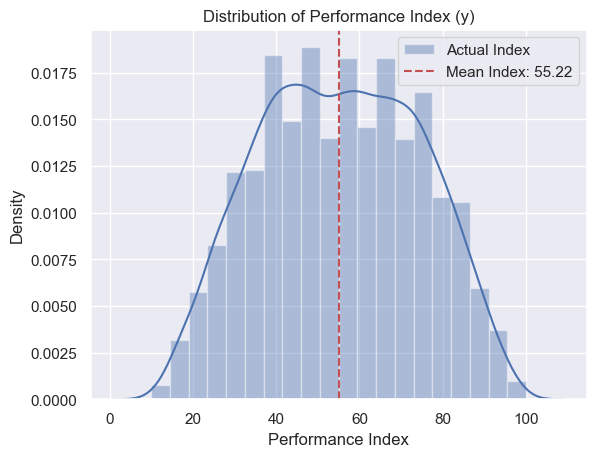

In [8]:
sns.set()

mean_performance = np.round(np.mean(df["Performance Index"]),2)

sns.distplot(a=df['Performance Index'], bins=20, label='Actual Index')
plt.axvline(mean_performance, c='r', linestyle='--', label=f'Mean Index: {mean_performance}')

plt.title("Distribution of Performance Index (y)")
plt.legend()
plt.show()

#### Findings:

- The distribution of the Performace Index target variable is `somewhat a normal distribution` with the peak being `Platykuric`.
- Most of the scores are evenly distributed which is also supported by the mean being 55.22 almost in the middle range.
- This means most of the students in this class scored an average score of around 55 with most of the data points lying between 
a performance index of 10 and 100, which is also 3 standard deviations over and under the mean.

## Input Features (x)

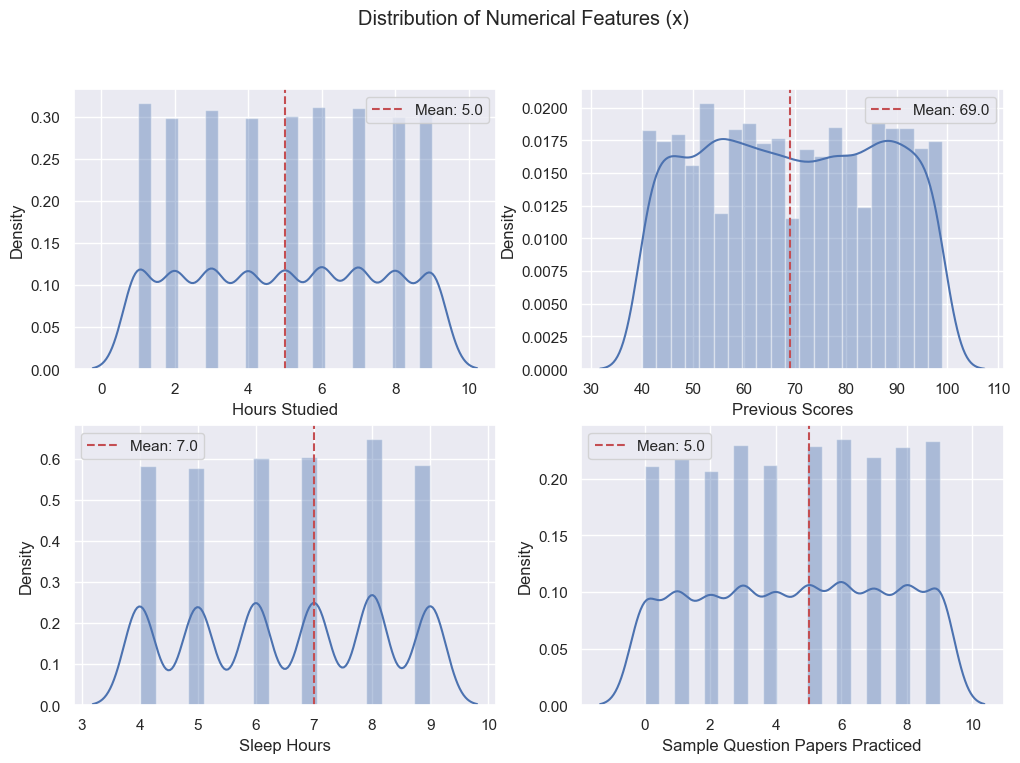

In [9]:
num_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
cat_feature = ['Extracurricular Activities']
input_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Extracurricular Activities', 'Sample Question Papers Practiced']

plt.figure(figsize=(12,8))

for i, column in enumerate(num_features, start=1):
    plt.subplot(2, 2, i)
    sns.distplot(x=df[column])
    mean= np.round(np.mean(df[column]))
    plt.axvline(mean, c='r', linestyle='--', label=f'Mean: {mean}')
    plt.xlabel(column)
    plt.legend()

plt.suptitle("Distribution of Numerical Features (x)")
plt.show()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64


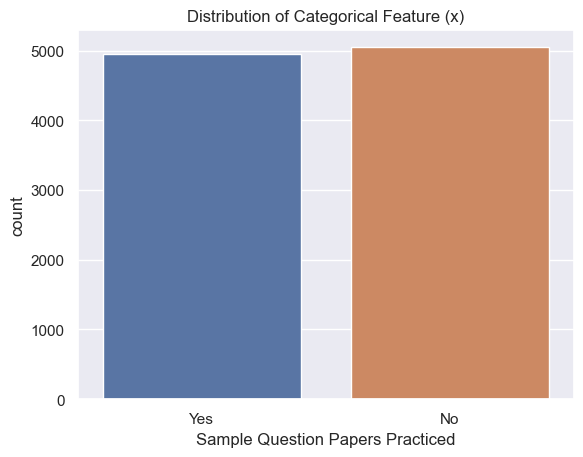

In [10]:
print(df['Extracurricular Activities'].value_counts())

fig = sns.countplot(x=df['Extracurricular Activities'])
    
plt.title("Distribution of Categorical Feature (x)")
plt.xlabel(column)
plt.show()

## Exploring the relationship b/w Input Feature and Target Variable

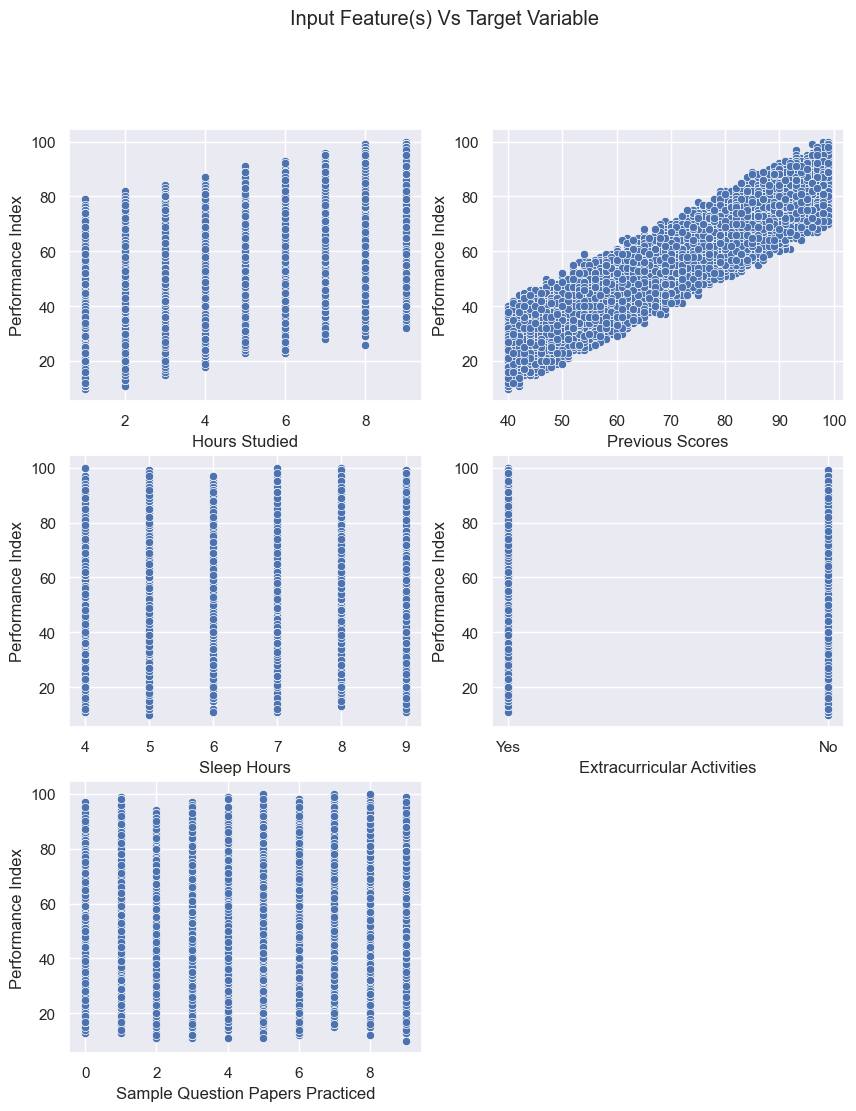

In [11]:
plt.figure(figsize=(10,12))

plt.ylabel('Performance Index')
for i, column in enumerate(input_features, start=1):
    plt.subplot(3,2,i)
    sns.scatterplot(x=df[column], y=df['Performance Index'])
    
plt.suptitle("Input Feature(s) Vs Target Variable")
plt.show()

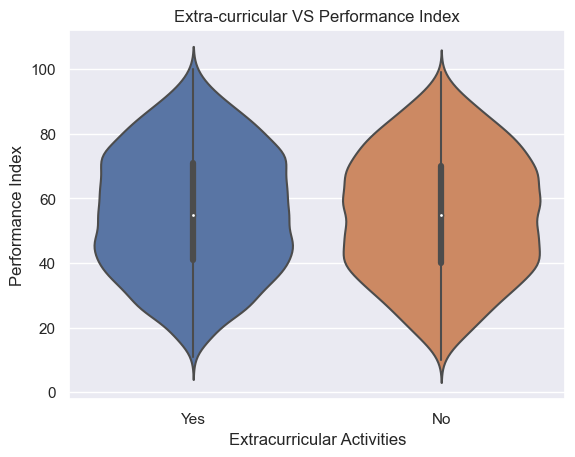

In [12]:
sns.violinplot(y='Performance Index', x='Extracurricular Activities', data=df)

plt.title("Extra-curricular VS Performance Index")
plt.show()

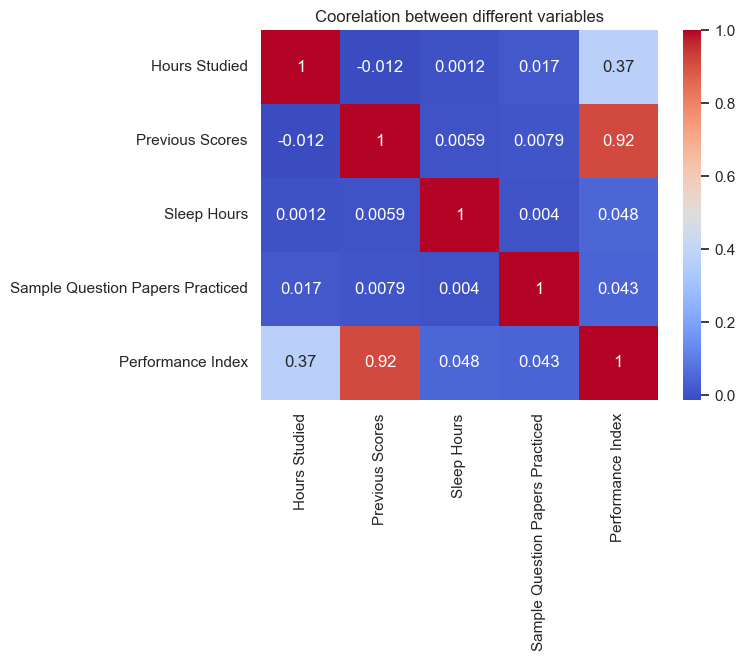

In [13]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

plt.title("Coorelation between different variables")
plt.show()

#### Findings:

1. Previous Scores and the Target Variable are highly correlated (0.92).
2. Rest of the input features don't seem to affect the targert variable.
3. The independent variables are also not related to each other, meaning there is very little multi-collinearity among the input features.

## Building the Linear Regression Model Using Gradient Descent

In [14]:
# Splitting the dataset
X = df[input_features] #input features
y = df['Performance Index'] # target variable

In [15]:
# Encoding the categorical column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['Extracurricular Activities'])
X['Extra_Curr Encoded'] = encoded_data

X.drop(['Extracurricular Activities'], axis=1, inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


In [17]:
gd = SGDRegressor() # initializing Gradient Descent Class

model = gd.fit(X_train, y_train) # training the model

print(f"Intercept: {np.round(model.intercept_[0],2)}")
print(f"Coefficient: {np.round(model.coef_,2)}")

Intercept: 201989137.33
Coefficient: [-15686981.15   -332673.71 -31822707.2   18873897.22  43723075.65]


In [18]:
y_pred = model.predict(X_test) # prediction

## Performance Metrics of the Model

In [19]:
n_rows = y_test.shape[0]
n_features = X_test.shape[1]

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
r2_score = r2_score(y_true=y_test, y_pred=y_pred)
adj_r2 = 1- ((1-r2_score)*(n_rows-1))/(n_rows-1-n_features)

print(f"MAE: {np.round(mae,2)}")
print(f"MSE: {np.round(mse,2)}")
print(f"RMSE: {np.round(rmse,2)}")
print(f"R2 Score: {np.round(r2_score,2)}")
print(f"Adj R2 Score: {np.round(adj_r2,2)}")

MAE: 72839931.01
MSE: 7883158305501891.0
RMSE: 88787151.69
R2 Score: -21272193526254.62
Adj R2 Score: -21325534031586.26


## Visualizing the Accuracy of the Model

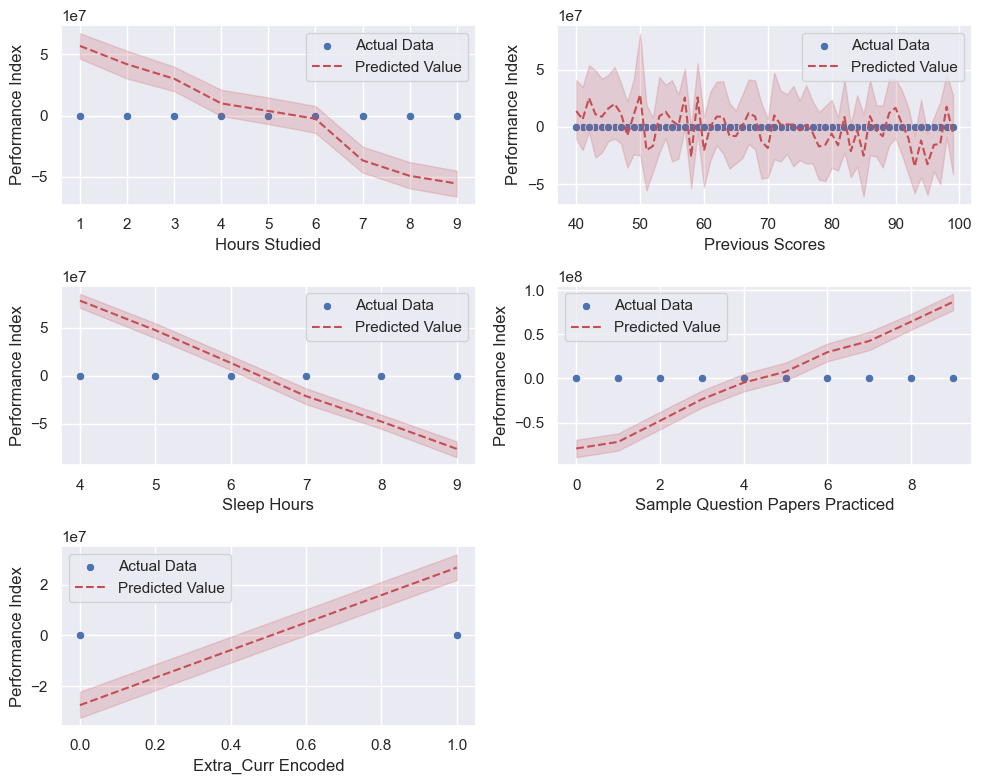

In [20]:
plt.figure(figsize=(10,8))

for i, column in enumerate(X_test, start=1):
    plt.subplot(3,2,i)
    sns.scatterplot(x=X_test[column], y=y_test, label='Actual Data')# actual data
    sns.lineplot(x=X_test[column], y=y_pred, c='r', linestyle='--', label = 'Predicted Value')

plt.tight_layout()

## Interpreting the Performance Metrics:

1. Mean Absolute Error (MAE): 72839931.01
2. Mean Squared Error (MSE): 7883158305501891.0
3. Root Mean Sqaured Error (RMSE): 88787151.69

- These metrics range in billions, meaning our model couldn't possibly perform worse than this.

4. R2 Score: -21272193526254.62
5. Adjusted Score: -21325534031586.26

- R2 and Adjusted R2 Score should never be negative it can really close to 0, but it should never be negative. This indicates the model is performing worse than a simple basline model.

## Results:

- We can conclude that the Gradient Descent Model is not performing well.
- We can confirm this from the performance metrics as well as the scatter plots.
- It's clear from these metrics that the model's predictions are far from accurate, and further investigation or improvements in the model are necessary.

## Building a Different Model using OLS

In [21]:
X.head(10)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extra_Curr Encoded
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
5,3,78,9,6,0
6,7,73,5,6,1
7,8,45,4,6,1
8,5,77,8,2,0
9,4,89,4,0,0


### Feature Scaling
- Scaling down the features using Z score Normalization

In [22]:
X_copy = X.copy()

In [23]:
from sklearn.preprocessing import StandardScaler

z_norm = StandardScaler()

X_scaled = z_norm.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 5)
X_test shape: (2000, 5)
y_train shape: (8000,)
y_test shape: (2000,)


In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # initializing the class

model = lr.fit(X_train, y_train)

print(f"Intercept: {np.round(model.intercept_,2)}")
print(f"Coefficient: {np.round(model.coef_,2)}")

Intercept: 55.24
Coefficient: [ 7.39 17.64  0.81  0.55  0.3 ]


In [26]:
y_pred = model.predict(X_test)

## Performance Metrics of the Model

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

n_rows = y_test.shape[0]
n_features = X_test.shape[1]

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
r2 = r2_score(y_true=y_test, y_pred=y_pred)
adj_r2 = 1- ((1-r2)*(n_rows-1))/(n_rows-1-n_features)

print(f"MAE: {np.round(mae,2)}")
print(f"MSE: {np.round(mse,2)}")
print(f"RMSE: {np.round(rmse,2)}")
print(f"R2 Score: {np.round(r2,2)}")
print(f"Adj R2 Score: {np.round(adj_r2,2)}")

MAE: 1.61
MSE: 4.08
RMSE: 2.02
R2 Score: 0.99
Adj R2 Score: 0.99


## Visualizing the Accuracy of the Model

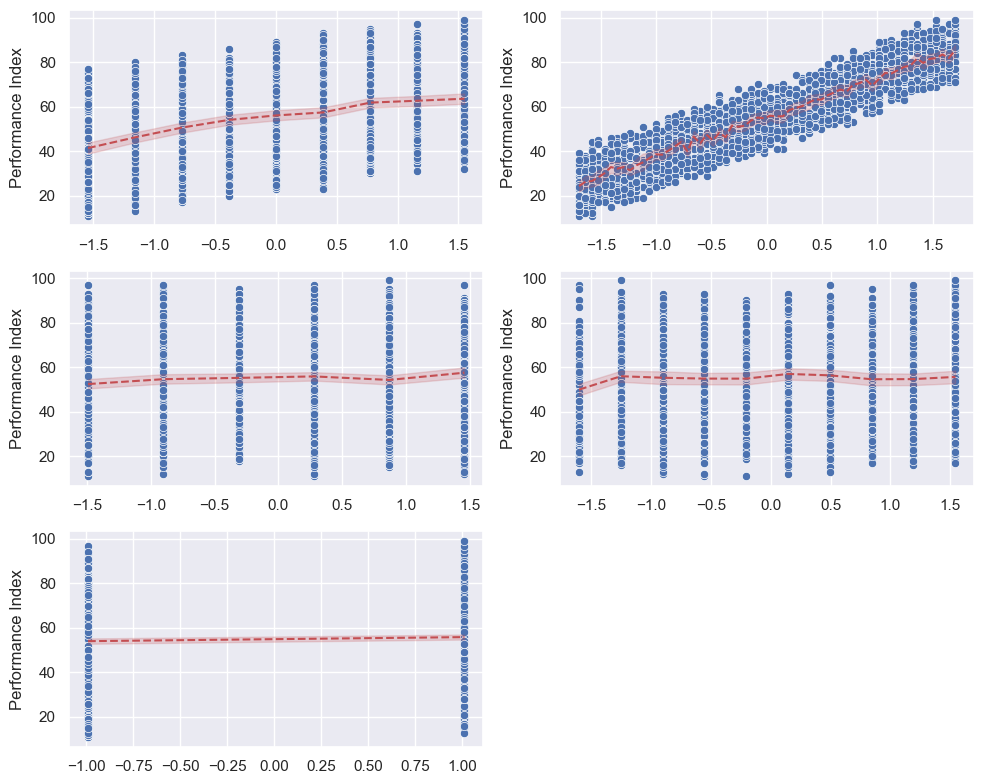

In [28]:
plt.figure(figsize=(10,8))

for i in range(X_test.shape[1]):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=X_test[:,i], y=y_test)# actual data
    sns.lineplot(x=X_test[:,i], y=y_pred, c='r', linestyle='--') # prediction values

plt.tight_layout()

## Interpreting the Performance Metrics:

1. Mean Absolute Error (MAE): 1.61
2. Mean Squared Error (MSE): 4.08
3. Root Mean Sqaured Error (RMSE): 2.02
4. R2 Score: 0.99
5. Adjusted Score: 0.99

## Results:

- The MAE, MSE, and RMSE values are all relatively low, suggesting that the new model's predictions are close to the actual values on average.
- The R2 score and Adjusted R2 score of 0.99 indicate that the new model explains approximately 99% of the variance in the target variable, which is very high and indicative of excellent predictive performance.
- These metrics collectively suggest that the new model is highly accurate and provides a very good fit to the data.
- We can conclude that the OLS Model is performing significantly well than the Gradient Descent.
- We can confirm this from the performance metrics as well as the scatter plots.

## Conclusion:

- We can confidently say the model built using OLS and Normal Equation is a really accurate model and we can rely on it to make accurate predictions about a student's performance index given the input features.